In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


from layer import HiddenLayer
from activations import *
from losses import *
from network import Network

random.seed(42)
np.random.seed(42)

(1000, 13)


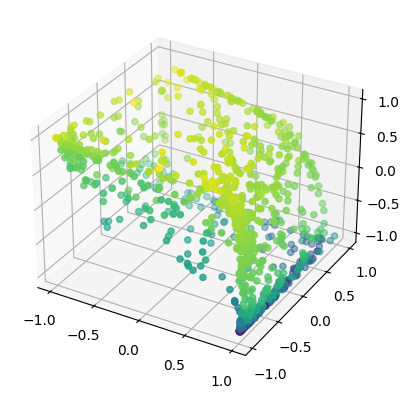

In [3]:
import matplotlib.pyplot as plt

columnIds = [
    "id",
    "x1",
    "x2",
    "x3",
    "x4",
    "x5",
    "x6",
    "x7",
    "x8",
    "x9",
    "x10",
    "y1",
    "y2",
    "y3",
]
dt = pd.read_csv("data/trainData.csv", sep=",", names=columnIds)
dt.set_index("id", inplace=True)
data = dt.to_numpy()
print(data.shape)

# plot last 3 values of the data in 3D space

# plot last 3 values of the data in 3D space and color the points according to the first label
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 7], data[:, 8], data[:, 9], c=data[:, 10])
plt.show()

In [4]:
data[0, 10:]

array([  7.897453, -35.936382,  21.077147])

In [5]:
layer = HiddenLayer(10, 3, ReLU())

In [6]:
layer.forward(data[0, 1:11])

array([[0.27894675, 0.11517114, 0.        ]])

In [7]:
data[0, 1:11].size

10

In [8]:
data[0, 1:11].flatten().shape

(10,)

In [9]:
a = np.array([[1, 2, 3]])

mse = MSE(1)

In [10]:
b = np.array([[4, 5, 6]])
mse.forward(a, b)

9.0

In [11]:
mse.forward(a.T, b.T)

9.0

In [12]:
a - b.T

array([[-3, -2, -1],
       [-4, -3, -2],
       [-5, -4, -3]])

In [13]:
mse.forward(a, b.T)

ValueError: Error: vectors must have same shape. The shapes are y_pred: (1, 3) and y_true: (3, 1)

In [ ]:
a = np.array([[1, 2, 3]])

softmax = Softmax()
softmax(a)

In [ ]:
test_input = data[0, 0:10].flatten()
test_input

In [ ]:
target_output = data[0, 10:14]
target_output

In [ ]:
net = Network(MSE(1))
print(net)

In [ ]:
net.add_layer(HiddenLayer(10, 6, ReLU()))
net.add_layer(HiddenLayer(6, 3, ReLU()))
print(net)

In [ ]:
net.forward(test_input)
#net.layers[-1].out
net.loss.forward(net.layers[-1].out, target_output)

In [ ]:
layerx = HiddenLayer(10, 6, ReLU())

In [ ]:
print(layerx.getW())

# Let's do a little net!

In [65]:
inputs = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])
y_true = np.array([[1, 0],
                   [3, 2],
                   [5, 6],
                   [0, 1]])
print(inputs.shape[0])
print(y_true[1:3])

4
[[3 2]
 [5 6]]


In [66]:
net = Network(MSE(1)) # 2 is the batch size
net.add_layer(HiddenLayer(3, 2, ReLU()))
net.add_layer(HiddenLayer(2, 2, Identity()))

In [67]:
print(net)

Network: 2 layers 
Loss: MSE


In [47]:
print(net.layers[0].W)
print(net.layers[0].W.T)

[[-0.39210857 -0.46857081]
 [ 0.13641041 -0.18564402]
 [ 0.00857069  0.40756647]]
[[-0.39210857  0.13641041  0.00857069]
 [-0.46857081 -0.18564402  0.40756647]]


In [ ]:
a = np.array([[1, 2, 1],
              [3, 4, 5]])
x = np.array([[1, 2, 3]])
print(a.shape, x.shape)
print(a.dot(x.T))

In [68]:
net.forward(inputs[0])
print(net.layers[0].out)
print(net.layers[1].out)

[[1.21115383 1.13324851]]
[[0.55374683 0.46757554]]


In [69]:
net.forward(inputs[0])
net.layers[-1].out

array([[0.55374683, 0.46757554]])

In [71]:
print(y_true[0].shape)

(2,)


In [73]:
net.forward(inputs[0])
net.loss.forward(net.layers[-1].out, y_true[0].reshape(1, 2))

0.2088843853054672

In [74]:
curr_delta = net.loss.backward(net.layers[-1].out, y_true[0].reshape(1, 2))

In [75]:
print(curr_delta)
print(np.sum(curr_delta, axis=0, keepdims=True))

[[-0.89250633  0.93515107]]
[[-0.89250633  0.93515107]]


In [ ]:
net.layers[0].out.shape

In [ ]:
print(net.layers[0].W.T.shape)

## Backpropagation check: XOR! ...impossible

In [4]:
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_true = np.array([[0],
                   [1],
                   [1],
                   [0]])
net = Network(MSE(1))
net.add_layer(HiddenLayer(2, 2, Identity()))
net.add_layer(HiddenLayer(2, 1, Identity()))
net.layers[0].W = np.array([[1, 1],
                            [1, 1]])
net.layers[0].b = np.array([[-1.5, -0.5]])

net.layers[1].W = np.array([[-1],
                             [1]])

net.layers[1].b = np.array([[-0.5]])
net.forward(inputs[0])
#check = y_true - net.layers[-1].out
#print(check)

In [14]:
print(net.layers[1])

HiddenLayer(input_size=2, units_size=1, activation=Identity)
W=
[[-1]
 [ 1]]
b=
[[-0.5]])


In [15]:
net.forward(inputs[1])
net.layers[-1].out

array([[0.5]])

In [29]:
s = np.array([[0, 0]])
l1 = s.dot([[1, 1], [1, 1]]) + np.array([[-1.5, -0.5]])
print(l1)
l2 = np.array([[-1], [1]])
out = l1.dot(l2) - 0.5
print(out)



[[-1.5 -0.5]]
[[0.5]]


In [30]:
net = Network(MSE(4)) # 4 is the batch size
net.add_layer(HiddenLayer(2, 2, ReLU()))
net.add_layer(HiddenLayer(2, 1, Sigmoid()))
net.forward(inputs)

In [31]:
# Let's see the initial weights and biases
print(net.layers[0],"\n\n\n", net.layers[1])

HiddenLayer(input_size=2, units_size=2, activation=ReLU)
W=
[[ 0.01423444  0.09241457]
 [-0.45354959  0.10754485]]
b=
[[-0.32947588 -0.43494841]]) 


 HiddenLayer(input_size=2, units_size=1, activation=Sigmoid)
W=
[[0.44888554]
 [0.46563203]]
b=
[[0.30839735]])


In [32]:
y_true.shape

(4, 1)

In [33]:
net.loss.forward(net.layers[-1].out, y_true)

0.2558513356866196

In [34]:
net.layers[-1].out

array([[0.57649402],
       [0.57649402],
       [0.57649402],
       [0.57649402]])

In [32]:
# Let's backpropagate
curr_delta = net.loss.backward(net.layers[-1].out, y_true)
net.backward(curr_delta) # default value for eta is 0.1

In [33]:
# Let's see with the updated weights and biases
net.forward(inputs)
net.loss.forward(net.layers[-1].out, y_true)

0.25405540637929874

In [34]:
net.layers[-1].out

array([[0.54473575],
       [0.50472249],
       [0.43816071],
       [0.39814746]])

In [35]:
for i in range(100000):
    net.forward(inputs)
    curr_delta = net.loss.backward(net.layers[-1].out, y_true)
    net.backward(curr_delta, eta=1e-3)

print(net.loss.forward(net.layers[-1].out, y_true))
print(net.layers[-1].out)
print(net.layers[0])
print(net.layers[1])

0.2500000000000851
[[0.50000029]
 [0.50000029]
 [0.50000029]
 [0.50000029]]
HiddenLayer(input_size=2, units_size=2, activation=ReLU)
W=
[[ 0.01423444  0.09241457]
 [-0.45354959  0.10754485]]
b=
[[-0.32947588 -0.43494841]])
HiddenLayer(input_size=2, units_size=1, activation=Sigmoid)
W=
[[0.44888554]
 [0.46563203]]
b=
[[1.16685122e-06]])


## Backpropagation check: Monk